# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns=100


## 1. Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv' , index_col=0)

In [3]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [4]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict

In [5]:
df['X3'].value_counts()

2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64

In [6]:
df.reset_index(inplace=True)
df.columns=list(df.iloc[18381])

# Remove row where ID = 'ID'
df=df[df.ID!="ID"]
df.reset_index(drop=True,inplace=True)

# Rename target variable as Y
df=df.rename(columns = {'default payment next month':'Y'})
df=df.astype(int)

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object')

## 2. EDA

In [8]:
default = df.Y.value_counts()
default

0    17471
1     5028
Name: Y, dtype: int64

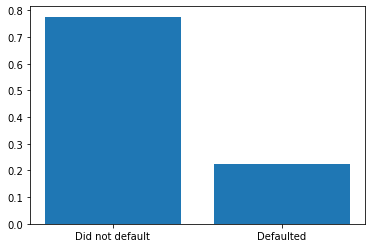

In [9]:
y = [default[0]/default.sum(), default[1]/default.sum()]
x = ['Did not default', 'Defaulted']

plt.bar(x,y)
plt.show()

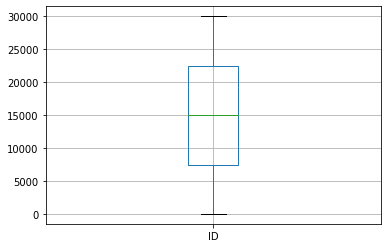

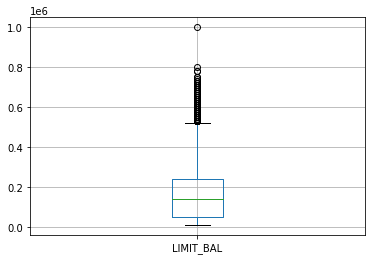

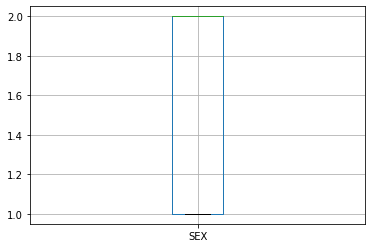

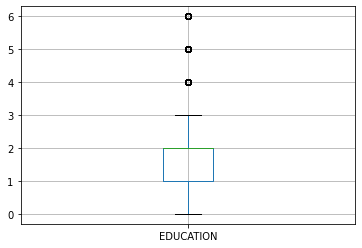

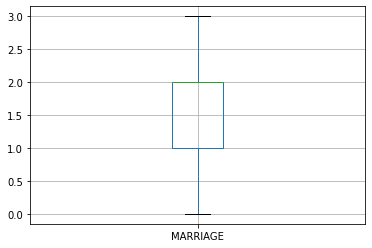

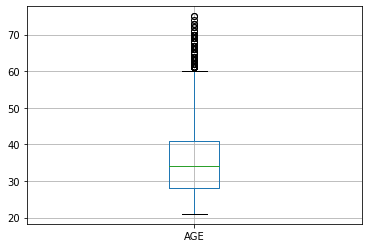

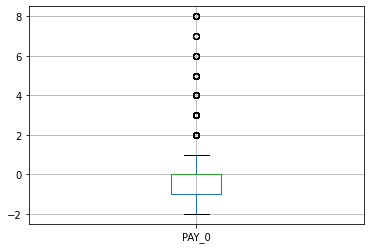

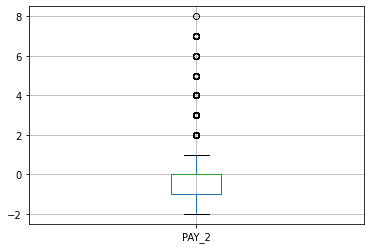

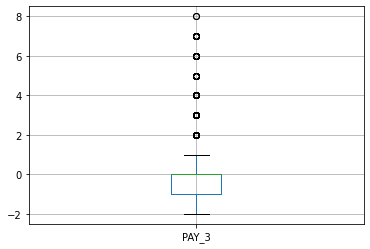

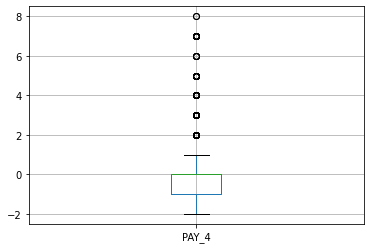

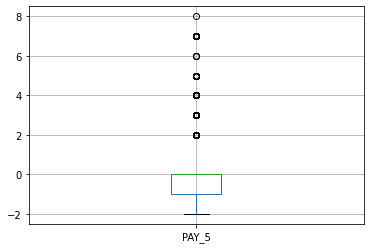

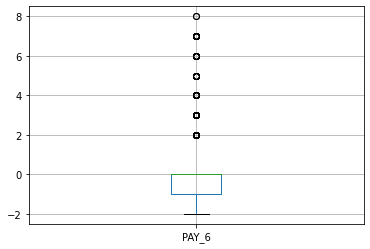

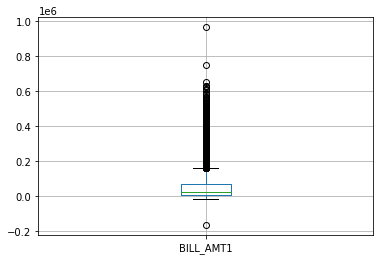

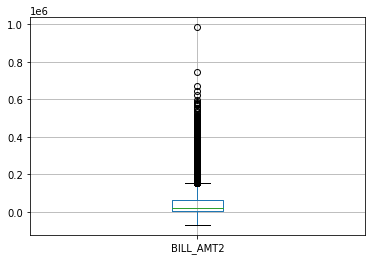

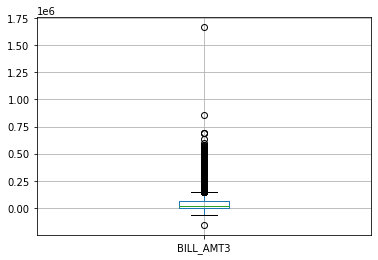

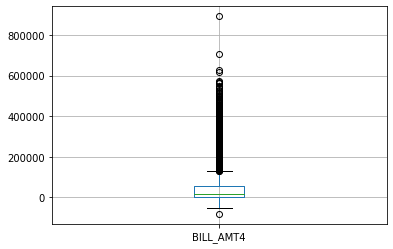

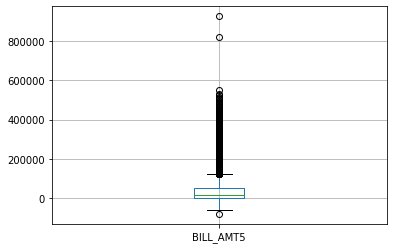

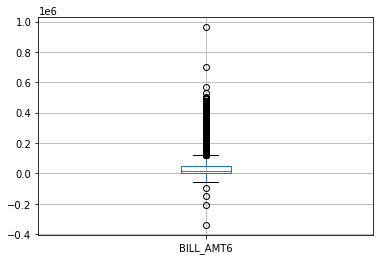

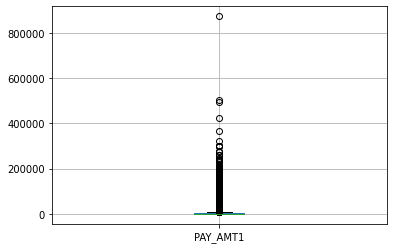

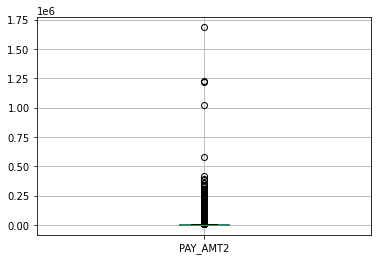

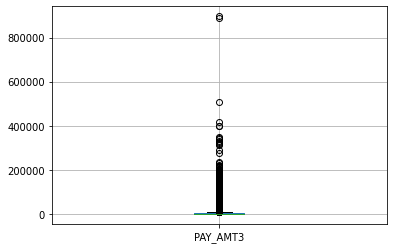

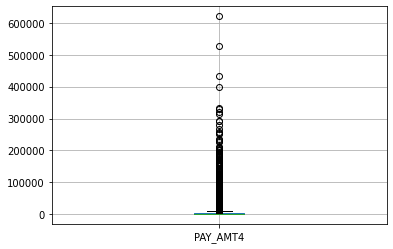

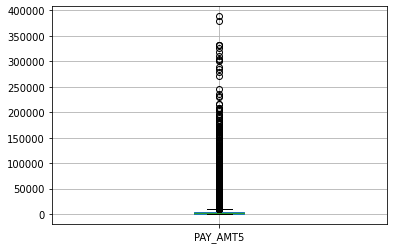

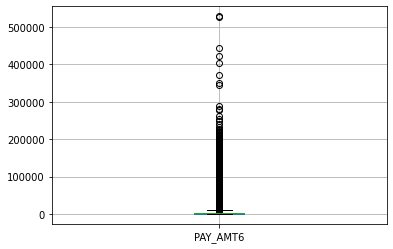

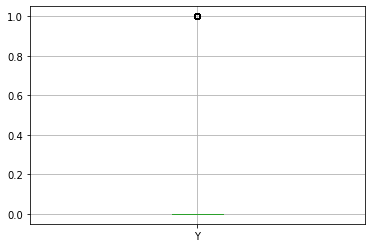

In [10]:
for column in df.columns:
    df.boxplot([column])
    plt.show()


/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/carlosruiz/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/carlosr

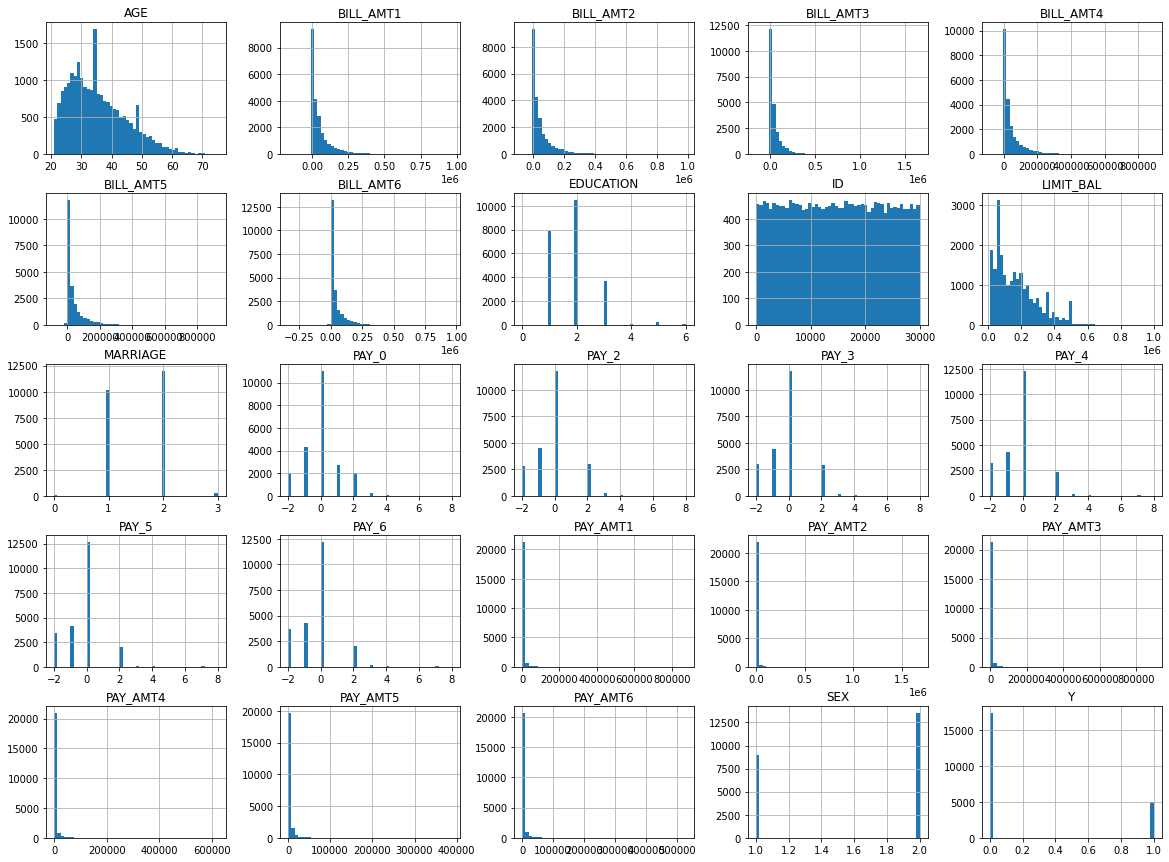

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object')

In [13]:
features = [str(x) for x in list(df.columns)[:-1]]

In [14]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

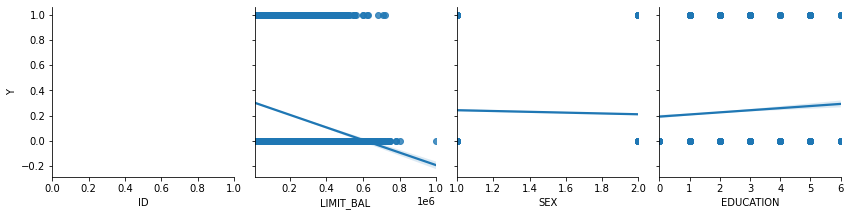

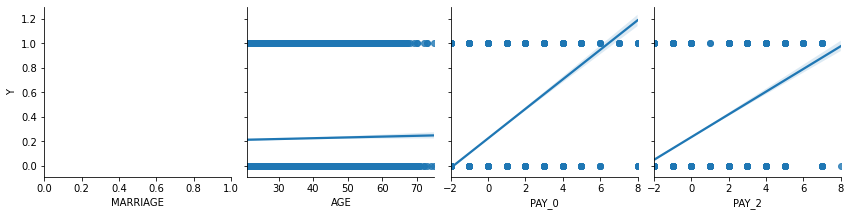

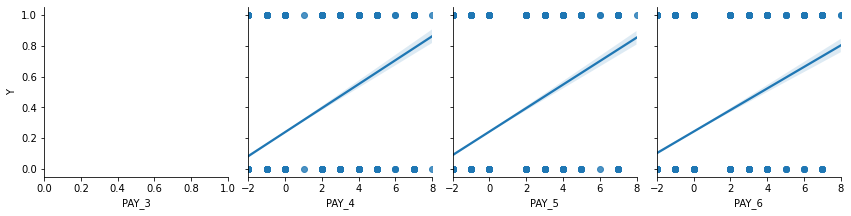

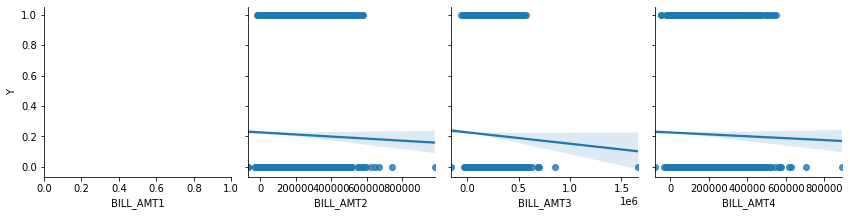

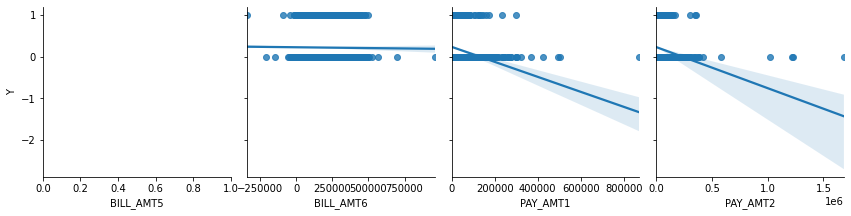

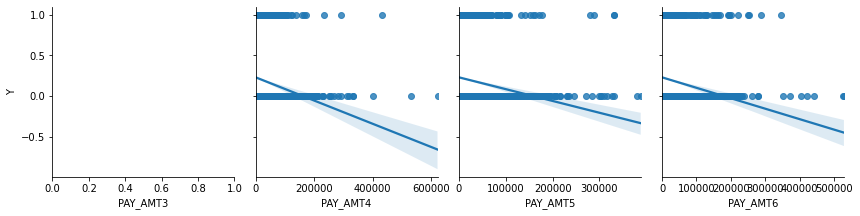

In [15]:
import seaborn as sns
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['Y'],x_vars=i, kind="reg", height=3)

## 3. Feature Engineering

In [16]:
df.MARRIAGE = df.MARRIAGE.apply(lambda x: 3 if x==0 else x)
df.MARRIAGE = df.MARRIAGE.apply(lambda x: 2 if x==3 else x)

In [17]:
conditions = [
    df.EDUCATION==0,
    df.EDUCATION==6
]

choices = [
    5,
    5
]

df.EDUCATION = np.select(conditions, choices, default=df.EDUCATION)

In [18]:
# Binning Age
conditions = [
    (df.AGE>=20)&(df.AGE<30),
    (df.AGE>=30)&(df.AGE<40),
    (df.AGE>=40)&(df.AGE<50),
    (df.AGE>=50)&(df.AGE<60),
    (df.AGE>=60)&(df.AGE<70),
    (df.AGE>=70)&(df.AGE<80)
]

choices = [
    '20s',
    '30s',
    '40s',
    '50s',
    '60s',
    '70s'
]

df.AGE = np.select(conditions, choices)

In [19]:
df['MON_OV_BAL']=0

In [20]:
conditions=[
    df.BILL_AMT1>=df.LIMIT_BAL,
    df.BILL_AMT2>=df.LIMIT_BAL,
    df.BILL_AMT3>=df.LIMIT_BAL,
    df.BILL_AMT4>=df.LIMIT_BAL,
    df.BILL_AMT5>=df.LIMIT_BAL,
    df.BILL_AMT6>=df.LIMIT_BAL,
]


hold_mon_ov=pd.DataFrame(np.where(conditions,1,0) )
tot_mon_ov=[]
for i in hold_mon_ov.columns:
    tot_mon_ov.append(hold_mon_ov[i].sum())


df['MON_OV_BAL']=tot_mon_ov

In [21]:
df['SUM_PAY_STAT']=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].sum(axis=1)
df['SUM_PAY_STAT']

0         0
1        -6
2       -12
3         0
4         0
         ..
22494     9
22495    -6
22496     3
22497    -8
22498    11
Name: SUM_PAY_STAT, Length: 22499, dtype: int64

In [22]:
conditions=[
    df.BILL_AMT2>=df.BILL_AMT1,
    df.BILL_AMT3>=df.BILL_AMT2,
    df.BILL_AMT4>=df.BILL_AMT3,
    df.BILL_AMT5>=df.BILL_AMT4,
    df.BILL_AMT6>=df.BILL_AMT5,
]

hold_mon_bill=pd.DataFrame(np.where(conditions,1,0) )
tot_mon_bill=[]
for i in hold_mon_bill.columns:
    tot_mon_bill.append(hold_mon_bill[i].sum())

df['MON_BIL_INC']=tot_mon_bill

df=pd.get_dummies(df,columns=['MON_BIL_INC'],drop_first=True)

In [23]:
total=[]
for i in range(len(df)):
    total.append(list(df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].loc[i].mode()))
total=[x[0]for x in total]
df['PAY_STAT_MODE']=total

In [24]:
df['BILL_AV']=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

In [25]:
df['PAY_AV']=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)

In [26]:
df['AVG_UTILIZATION'] = df.BILL_AV/df.LIMIT_BAL

In [27]:
df['AVG_PERCENT_PAID'] = df.PAY_AV/df.BILL_AV

In [28]:
df.AVG_PERCENT_PAID.fillna(value=0, inplace=True)

In [29]:
df.AVG_PERCENT_PAID.replace(np.inf, value=0, inplace=True)

In [30]:
df=pd.get_dummies(df,columns=['AGE'],drop_first=True)

In [31]:
df['PERCENT_USAGE']=(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)*600)/(df['LIMIT_BAL']*6)

In [32]:
df['BEEN_LATE']=0
conditions=[
(df.PAY_0>=1)|(df.PAY_2>=1)|(df.PAY_3>=1)|(df.PAY_4>=1)|(df.PAY_5>=1)|(df.PAY_6>=1),

]
choises = [
    1,
]
df['BEEN_LATE']=np.select(conditions,choises,default=0)   
      

In [33]:
df['TOTAL_USAGE']=(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1))

In [34]:
df['TOTAL_PAY']=(df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1))

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC_1,MON_BIL_INC_2,MON_BIL_INC_3,MON_BIL_INC_4,MON_BIL_INC_5,PAY_STAT_MODE,BILL_AV,PAY_AV,AVG_UTILIZATION,AVG_PERCENT_PAID,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s,PERCENT_USAGE,BEEN_LATE,TOTAL_USAGE,TOTAL_PAY
0,28835,220000,2,1,2,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,3,0,0,1,0,0,0,0,208387.166667,31485.166667,0.947214,0.151090,1,0,0,0,0,568.328636,0,1250323,188911
1,25329,200000,2,3,2,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,0,-6,0,0,0,0,1,-1,326.000000,326.000000,0.001630,1.000000,0,0,0,0,0,0.978000,0,1956,1956
2,18894,180000,2,1,2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-12,0,0,0,0,1,-2,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0
3,690,80000,1,2,2,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,0,0,1,0,0,0,0,46583.666667,1601.833333,0.582296,0.034386,1,0,0,0,0,349.377500,0,279502,9611
4,6239,10000,1,2,2,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,0,0,1,0,0,0,0,5318.333333,883.333333,0.531833,0.166092,0,0,0,0,0,319.100000,0,31910,5300


In [36]:


conditions=[
    df.BILL_AMT1>df.LIMIT_BAL,
    df.BILL_AMT2>df.LIMIT_BAL,
    df.BILL_AMT3>df.LIMIT_BAL,
    df.BILL_AMT4>df.LIMIT_BAL,
    df.BILL_AMT5>df.LIMIT_BAL,
    df.BILL_AMT6>df.LIMIT_BAL,

]


hold=np.where(conditions,1,0) 


df['OV_BILL1']=hold[0]
df['OV_BILL2']=hold[1]
df['OV_BILL3']=hold[2]
df['OV_BILL4']=hold[3]
df['OV_BILL5']=hold[4]
df['OV_BILL6']=hold[5]

In [37]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC_1,MON_BIL_INC_2,MON_BIL_INC_3,MON_BIL_INC_4,MON_BIL_INC_5,PAY_STAT_MODE,BILL_AV,PAY_AV,AVG_UTILIZATION,AVG_PERCENT_PAID,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s,PERCENT_USAGE,BEEN_LATE,TOTAL_USAGE,TOTAL_PAY,OV_BILL1,OV_BILL2,OV_BILL3,OV_BILL4,OV_BILL5,OV_BILL6
0,28835,220000,2,1,2,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,3,0,0,1,0,0,0,0,208387.166667,31485.166667,0.947214,0.151090,1,0,0,0,0,568.328636,0,1250323,188911,1,1,0,1,0,0
1,25329,200000,2,3,2,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,0,-6,0,0,0,0,1,-1,326.000000,326.000000,0.001630,1.000000,0,0,0,0,0,0.978000,0,1956,1956,0,0,0,0,0,0
2,18894,180000,2,1,2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-12,0,0,0,0,1,-2,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,0,0,1,0,0,0,0,46583.666667,1601.833333,0.582296,0.034386,1,0,0,0,0,349.377500,0,279502,9611,0,0,0,0,0,0
4,6239,10000,1,2,2,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,0,0,1,0,0,0,0,5318.333333,883.333333,0.531833,0.166092,0,0,0,0,0,319.100000,0,31910,5300,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,16247,40000,2,2,1,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1,1,9,0,0,0,1,0,2,39041.166667,1711.500000,0.976029,0.043838,1,0,0,0,0,585.617500,1,234247,10269,0,0,0,0,0,1
22495,2693,350000,1,1,1,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0,0,-6,0,1,0,0,0,-1,4068.333333,5210.166667,0.011624,1.280664,0,1,0,0,0,6.974286,0,24410,31261,0,0,0,0,0,0
22496,8076,100000,2,3,2,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0,0,3,0,0,0,1,0,-1,4134.333333,3154.000000,0.041343,0.762880,0,1,0,0,0,24.806000,1,24806,18924,0,0,0,0,0,0
22497,20213,20000,2,3,1,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1,0,-8,0,0,1,0,0,-1,2583.666667,1825.000000,0.129183,0.706360,0,0,1,0,0,77.510000,0,15502,10950,0,0,0,0,0,0


## 4. Feature Selection

In [38]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC_1,MON_BIL_INC_2,MON_BIL_INC_3,MON_BIL_INC_4,MON_BIL_INC_5,PAY_STAT_MODE,BILL_AV,PAY_AV,AVG_UTILIZATION,AVG_PERCENT_PAID,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s,PERCENT_USAGE,BEEN_LATE,TOTAL_USAGE,TOTAL_PAY,OV_BILL1,OV_BILL2,OV_BILL3,OV_BILL4,OV_BILL5,OV_BILL6
0,28835,220000,2,1,2,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,3,0,0,1,0,0,0,0,208387.166667,31485.166667,0.947214,0.151090,1,0,0,0,0,568.328636,0,1250323,188911,1,1,0,1,0,0
1,25329,200000,2,3,2,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,0,-6,0,0,0,0,1,-1,326.000000,326.000000,0.001630,1.000000,0,0,0,0,0,0.978000,0,1956,1956,0,0,0,0,0,0
2,18894,180000,2,1,2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-12,0,0,0,0,1,-2,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,0,0,1,0,0,0,0,46583.666667,1601.833333,0.582296,0.034386,1,0,0,0,0,349.377500,0,279502,9611,0,0,0,0,0,0
4,6239,10000,1,2,2,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,0,0,1,0,0,0,0,5318.333333,883.333333,0.531833,0.166092,0,0,0,0,0,319.100000,0,31910,5300,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,16247,40000,2,2,1,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1,1,9,0,0,0,1,0,2,39041.166667,1711.500000,0.976029,0.043838,1,0,0,0,0,585.617500,1,234247,10269,0,0,0,0,0,1
22495,2693,350000,1,1,1,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0,0,-6,0,1,0,0,0,-1,4068.333333,5210.166667,0.011624,1.280664,0,1,0,0,0,6.974286,0,24410,31261,0,0,0,0,0,0
22496,8076,100000,2,3,2,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0,0,3,0,0,0,1,0,-1,4134.333333,3154.000000,0.041343,0.762880,0,1,0,0,0,24.806000,1,24806,18924,0,0,0,0,0,0
22497,20213,20000,2,3,1,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1,0,-8,0,0,1,0,0,-1,2583.666667,1825.000000,0.129183,0.706360,0,0,1,0,0,77.510000,0,15502,10950,0,0,0,0,0,0


## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [39]:
x=df[df.columns[df.columns!='Y']]
y=df.Y

In [40]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2020)

In [41]:
y

0        1
1        0
2        0
3        0
4        1
        ..
22494    1
22495    0
22496    0
22497    1
22498    0
Name: Y, Length: 22499, dtype: int64

## 6. Model Evaluation

In [42]:
params_fin = {'max_depth': list(range(1,10)),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [3,5],
              'min_impurity_decrease': [0.0]}

In [43]:
dtc2 = DecisionTreeClassifier(random_state=1, class_weight ='balanced' )

# Create the instance
grid_fin2 = GridSearchCV(dtc2, params_fin, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the decision tree classifier to the training data
grid_fin2.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   23.8s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [3, 5]},
             scoring='f1', verbose=1)

In [48]:
print('Best Train Score: %f' % (grid_fin2.best_score_))
print('Best Params:', grid_fin2.best_params_)

Best Train Score: 0.522667
Best Params: {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [49]:
y_pred_test=grid_fin2.predict(X_test)

In [50]:
print('Testing F1:', metrics.f1_score(y_test, y_pred_test))

Testing F1: 0.5427830596369922


## 7. Final Model

In [52]:
import pickle
pickle_out = open('Model.pickle', 'wb')
pickle.dump(grid_fin2, pickle_out)
pickle_out.close()